# GUIÓN DE PRÁCTICAS DE REDES NEURONALES ARTIFICIALES
 **Parte I, Nicolás Delgado Guerrero**

## Introducción.
Una de las bibliotecas de Python más potentes y fáciles de usar para desarrollar y evaluar modelos de aprendizaje profundo es Keras; En ella se encuentran las bibliotecas de computación numérica Theano y TensorFlow. La ventaja de esta es principalmente que podemos trabajar con redes neuronales artificiales de una manera fácil.

Para esta práctica usaremos el entorno de trabajo Google Colab, en él trabajaremos conectados en la nube, las ventajas como ventajas tenemos la posibilidad de usar hasta 25GB de memoria RAM en la versión gratuita y disponibilidad de computo en GPU. Datos muchos más ventajosos que trabajar directamente con mi ordenador personal. Además en el notebook de google colab tenemos ya intalado tensorflow.

## Clasificación de vinos.
Para esta práctica, se utilizará el conjunto de datos de calidad del vino que puede encontrar en el conjunto de datos de calidad del vino en UCI. Idealmente, realiza un aprendizaje profundo en conjuntos de datos más grandes, pero para el propósito de esta práctica, se utilizará uno más
pequeño. Esto se debe principalmente a que el objetivo es comenzar con la biblioteca y familiarizarse con el funcionamiento de las redes neuronales.

## Cargando en los datos.
Esto se puede hacer fácilmente con la biblioteca de manipulación de datos de Python Pandas. Para ello se importa el paquete bajo su alias, pd.
A continuación, utiliza la read_csv() función para leer en los archivos CSV en los que se almacenan los datos. Además, se usa el argumento sep para especificar que el separador, en este caso, es un punto y coma y no una coma regular.

Cargaremos los datos directamente de nuestra cuenta de google drive, para ello usaremos el siguiente código.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = '/content/drive/My Drive/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Con ello ya tenemos en nuestro directorio de Colab nuestra cuenta de Drive con todos los archivos que tengamos en la nube. 

In [0]:
# Cargamos la biblioteca panda
import pandas as pd

# Leemos datos de vino blano
white = pd.read_csv(DATA_DIR + 'winequality-white.csv', sep = ';')

# Leemos datos de vino tinto
red = pd.read_csv(DATA_DIR + 'winequality-red.csv', sep = ';')

## Exploración de Datos.
Ahora haremos una inspección rápida de los datos para determinar si se cargarón correctamente.

In [3]:
print(white.info())
print(red.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column   

Con el método info() podemos determinar la estructura de nuestro dataset, el número de filas, columnas, nombre de las variables, etc. Se puede verificar la presencia de valores nulos con la ayuda de isnull(). 


In [4]:
pd.isnull(white)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False,False
4896,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
pd.isnull(red)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


Algunas funciones de pandas como: head(), tail() y sample() son fantásticas porque brindan una forma rápida de inspeccionar los datos.

In [6]:
print(red.head()) #5 primeras instancias de red
print(white.tail()) #5 últimas instancias de white
print(red.sample(5)) #5 instancias aleatorias 

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]
      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
4893            6.2              0.21         0.29  ...       0.50     11.2        6
4894            6.6              0.32         0.36  ...       0.46      9.6        5
4895            6.5              0.24         0.19  ...       0.46      9.4        6
4896            5.5              0.29         0.30  ...       0.38     12.8        7
4897            6.0              0.21         0.38  ...     

Ahora medaiante la función describe observamos los estadísticos básicos para hacer un primer análisis de los datos.

In [7]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Visualizando los datos.
Para hacer más comprensibles los datos que hemos obtenido, desarrolaremos distintas gráficas para determinar el comportamiento de las variables de cada dataset.

### Alcohol.

Una variable que puedes encontrar interesante a primera vista es alcohol. Probablemente sea una de las primeras variables que llame su atención cuando inspeccione el conjunto de datos de vinos. Puede visualizar las distribuciones con cualquier biblioteca de visualización de datos, pero en este caso, vamos a utilizar matplotlib para trazar las distribuciones rápidamente:

Text(0.5, 0.98, 'Distribución of Alcohol in % Vol')

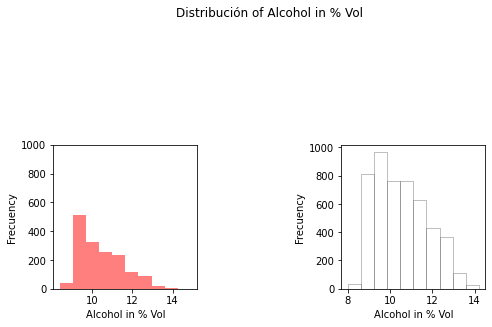

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor = 'red', alpha = 0.5, label = 'Red Wine')
ax[1].hist(white.alcohol, 10, facecolor = 'white', ec = 'black', lw = 0.5, alpha = 0.5, label = 'Red Wine')

fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 0.5, hspace = 0.5, wspace = 1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel('Alcohol in % Vol')
ax[0].set_ylabel('Frecuency')
ax[1].set_xlabel('Alcohol in % Vol')
ax[1].set_ylabel('Frecuency')

fig.suptitle('Distribución of Alcohol in % Vol')


Se observa que los niveles de alcohol entre el vino tinto y el blanco son básicamente los mismos: tienen alrededor del 9% de alcohol. Por supuesto, también hay una cantidad considerable de observaciones que tienen un 10% o 11% de porcentaje de alcohol.


### Sulfatos.

A continuación, una cosa que puede interesar es la relación entre los sulfatos y la calidad del
vino. Como se ha dicho anteriormente los sulfatos pueden causar dolores de cabeza a las
personas, y puede ser interesante saber si esto influye en la calidad del vino. Tal vez esto afecta
las calificaciones para el vino tinto?

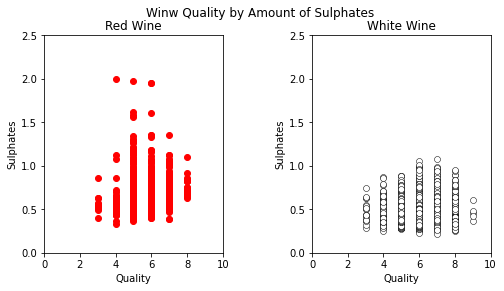

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4))

ax[0].scatter(red['quality'], red['sulphates'], facecolor = 'red')
ax[1].scatter(white['quality'], white['sulphates'], facecolor = 'white', ec = 'black', lw = 0.5)

ax[0].set_title('Red Wine')
ax[1].set_title('White Wine')
ax[0].set_xlabel('Quality')
ax[1].set_xlabel('Quality')
ax[0].set_ylabel('Sulphates')
ax[1].set_ylabel('Sulphates')
ax[0].set_xlim([0, 10])
ax[1].set_xlim([0, 10])
ax[0].set_ylim([0, 2.5])
ax[1].set_ylim([0, 2.5])

fig.subplots_adjust(wspace = 0.5)
fig.suptitle('Winw Quality by Amount of Sulphates')

plt.show()

El vino tinto parece contener más sulfatos que el vino blanco, que tiene menos sulfatos por encima de 1 g / . Para el vino blanco, solo parece haber
un par de excepciones que caen justo por encima de 1 g / , mientras que esto definitivamente es más para los vinos tintos. 
Puede verse claramente que hay vino blanco con una cantidad relativamente baja de sulfatos que obtiene una puntuación de 9, pero por lo demás, es difícil interpretar los datos correctamente en este momento.

### Acidez.

Además de los sulfatos, la acidez es una de las principales aracterísticas vitales del vino necesarias para lograr vinos de calidad. Hagamos un diagrama de dispersión que represente el alcohol versus la acidez volátil. Los puntos asociados a los datos deben colorearse de acuerdo con su clasificación:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

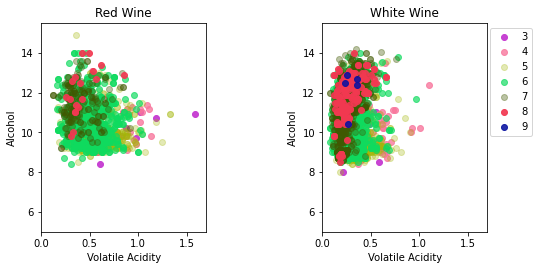

In [11]:
import numpy as np

np.random.seed(13)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

fig, ax = plt.subplots(1, 2, figsize = (8, 4))
redcolors = np.random.rand(6, 4)
whitecolors = np.append(redcolors, np.random.rand(1, 4), axis = 0)

for i in range(len(redcolors)):
  redy = red['alcohol'][red.quality == redlabels[i]]
  redx = red['volatile acidity'][red.quality == redlabels[i]]
  ax[0]. scatter(redx, redy, c = redcolors[i])

for i in range(len(whitecolors)):
  whitey = white['alcohol'][white.quality == whitelabels[i]]
  whitex = white['volatile acidity'][white.quality == whitelabels[i]]
  ax[1]. scatter(whitex, whitey, c = whitecolors[i])

ax[0].set_title('Red Wine')
ax[1].set_title('White Wine')
ax[0].set_xlim([0, 1.7])
ax[1].set_xlim([0, 1.7])
ax[0].set_ylim([5, 15.5])
ax[1].set_ylim([5, 15.5])

ax[0].set_xlabel('Volatile Acidity')
ax[0].set_ylabel('Alcohol')
ax[1].set_xlabel('Volatile Acidity')
ax[1].set_ylabel('Alcohol')

ax[1].legend(whitelabels, loc = 'best', bbox_to_anchor = (1.3, 1))

fig.subplots_adjust(top = 0.85, wspace = 0.7)

plt.show()

En la imagen de arriba, puede verse por ejemplo que: la mayoría de los vinos con etiqueta 8 tienen niveles de acidez volátiles de 0.5 o menos, pero si tiene o no un efecto en la calidad también es difícil de decir, ya que todos los puntos de datos están muy densamente agrupados hacia un lado
del gráfico.

## Preprocesamiento de Datos

¡Ahora que ha explorado sus datos, es hora de actuar sobre las ideas que ha obtenido!
¡Preprocesemos los datos y comencemos a construir la red neuronal !


In [0]:
# Contruimos las etiquetas, 1 vino tinto, 0 blanco
red['type'] = 1
white['type'] = 0

# Conctenamos los dataset de vinos tintos y blancos
wines = red.append(white, ignore_index = True)

Se establece ignore_index a True en este caso ya no desea mantener las etiquetas de índice de white cuando se está añadiendo los datos al conjunto red: desea que las etiquetas continúen desde donde lo dejaron en red, y las etiquetas de índice no duplicados unirse a ambos conjuntos de datos en uno nuevo.


## Matriz de Correlación.

Ahora que tenemos el conjunto de datos completo, es una buena idea también hacer una exploración rápida de datos; Ahora es hora de recopilar algunas ideas más sólidas en conjunto.
Dado que puede ser algo difícil interpretar gráficos, también es una buena idea trazar una matriz de correlación. Esto proporcionará información más rápidamente sobre qué variables se correlacionan:


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


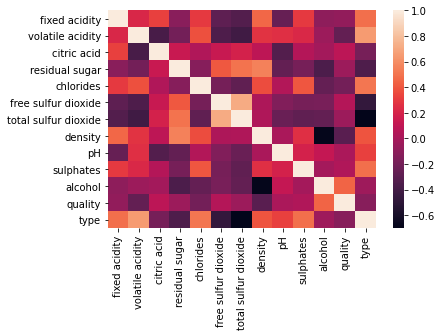

In [13]:
import seaborn as sns

corr = wines.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

Como era de esperar, hay algunas variables que se correlacionan, como density y residual sugar. También volatile acidity, y type están más estrechamente conectadas de lo que inicialmente podríamos habernos imaginado mirando a los dos conjuntos de datos por separado, y era esperable que free sulfur dioxide y total sulfur dioxide iban a estar correlacionadas.

## Conjuntos de Entrenamiento y Test.

Cuando se habla de datos desequilibrados datos en un problema de clasificación normalmente se refiere a un problema, donde las clases no están representadas igualmente, es decir no tienen exactamente el mismo número de casos en cada clase, pero una pequeña diferencia a menudo no
es importante. Por tanto, es necesario asegurarse que las dos clases de vino están presentes en el modelo de formación. Además, la cantidad de instancias de los dos tipos de vino debe ser más o menos igual para que no favorezca a una u otra clase en sus predicciones. En este caso, parece haber un desequilibrio, pero esto no será un problema en este caso.
Posteriormente, al evaluar el modelo, si tiene un rendimiento inferior, se puede recurrir al submuestreo o al sobremuestreo para ocultar la  iferencia en las observaciones.

Creamos los conjuntos de train y test para poder crear un modelo de clasificación y medir su bondad. 

In [0]:
from sklearn.model_selection import  train_test_split

X = wines.iloc[:, 0:11]
y = np.ravel(wines.type)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

Ya estamos preparados para construir nuestra primera red neuronal, pero todavía hay una cosa con la que tenemos que tener cuidado. Para que el rango de valores de cada variable no influya para la clasificación normalizaremos los datos.

### Estandarizar los datos: Normalización.

La normalización (estardarización) es una forma de lidiar con estos valores que están tan separados. El paquete scikit-learn le ofrece una forma excelente y rápida de estandarizar sus datos: 


In [0]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Datos del modelo
Como únicamente tenemos dos clases: blanco y rojo, vamos a hacer una clasificación binaria. Como puedes imaginar, "binario" significa 0 o 1, sí o no. Dado que las redes neuronales solo pueden funcionar con datos numéricos, ya ha codificado rojo como 1 y blanco como 0.

Un tipo de red que funciona bien en tal problema es un Perceptrón Multicapa. Este tipo de red neuronal está a menudo completamente conectada. Eso significa que se busca construir una serie de capas completamente conectadas para resolver este problema. En cuanto a la función de activación que se usará, es mejor usar una de las más comunes aquí con el fin de familiarizarse con Keras y las redes neuronales, que es la función de activación relu.

In [16]:
%tensorflow_version 2.x
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
#Inicializamos modelo red
model = tensorflow.keras.Sequential()
#Capa de entrada de datos
model.add(keras.layers.Dense(12, activation = 'relu', input_shape = (11,)))
#Capa densa
model.add(keras.layers.Dense(8, activation = 'relu'))
#Capa de salida
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

Using TensorFlow backend.


Ya tenemos nuestro modelo generado, veamos la arquitectura de la red con las siguientes sentencias:

In [18]:
model.output_shape
model.summary()
model.get_config()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


{'build_input_shape': TensorShape([None, 11]),
 'layers': [{'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 11),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 12,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_1',
    'tra

# Compilar y ajustar el modelo.

A continuación, es hora de compilar el modelo creado y ajustarlo a los datos: utilizar compile() y fit():

In [19]:
model.get_weights() #Pesos de la red
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 20, batch_size = 1, verbose = 1)

Epoch 1/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0853 - accuracy: 0.9777
Epoch 2/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0245 - accuracy: 0.9947
Epoch 3/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0199 - accuracy: 0.9956
Epoch 4/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0188 - accuracy: 0.9954
Epoch 5/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0160 - accuracy: 0.9966
Epoch 6/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0151 - accuracy: 0.9966
Epoch 7/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0145 - accuracy: 0.9966
Epoch 8/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0139 - accuracy: 0.9968
Epoch 9/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0133 - accuracy: 0.9972
Epoch 10/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.012

Tanto optimizer como loss son dos argumentos que se requieren si se desea compilar el modelo. Algunos de los algoritmos de optimización más populares utilizados son el Descenso de gradiente estocástico (SGD), ADAM y RMSprop. Dependiendo del algoritmo que elija, deberá ajustar ciertos parámetros, como la velocidad de aprendizaje o el término momentum (impulso). La elección de una función de error depende de la tarea que se tenga entre manos: por ejemplo, para un problema de regresión,  eneralmente usará el error cuadrático medio (MSE). Como puede ver
en este ejemplo, se utilizó binary_crossentropy, el problema de clasificación binaria para determinar si un vino es rojo o blanco. Por último, con la clasificación de varias clases, hará uso de categorical_crossentropy.

En otras palabras, se debe entrenar el modelo durante un número específico de épocas o exposiciones del conjunto de datos de entrenamiento. Una época es un solo paso a través de todo el conjunto de entrenamiento, seguido de una prueba del conjunto de verificación. El tamaño de lote que se especifique en el código anterior define el número de muestras que se propagarán a través de la red. Además, al hacer esto, se optimiza la eficiencia porque se asegura de no cargar demasiados patrones de entrada en la memoria al mismo tiempo.

# Predecir valores.

 Puede hacer predicciones para las etiquetas del conjunto de pruebas
con él. Simplemente use predict() y pasa el conjunto de prueba para predecir las etiquetas de los
datos. En este caso, el resultado se almacena en y_pred:

In [0]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [25]:
print(y_pred)
print(y_test)

[[False]
 [ True]
 [False]
 ...
 [False]
 [False]
 [False]]
[0 1 0 ... 0 0 0]


# Evaluar nuestra Red Neural Artificial 

Ahora que hemos creado nuestra red y la hemos utilizado para hacer predicciones sobre datos que aún no había visto, es hora de evaluar su rendimiento. Se puede comparar visualmente las predicciones con las etiquetas de prueba reales (y_test), o se puede usar todo tipo de métricas para determinar el rendimiento real. En este caso, usarás evaluate() para hacer esto. Pasar los datos de prueba y las etiquetas de prueba y, si quieres, coloca el argumento verbose a 1. 

In [26]:
score = model.evaluate(X_test, y_test, verbose = 1)
print(score) #Devuelve valor de la función de perdida y el accuracy

68/68 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 0.9953
[0.024145003408193588, 0.9953380227088928]


En este caso, probarás algunas técnicas básicas de evaluación de clasificación, como:

● La matriz de confusión, que es un desglose de las predicciones en una tabla que muestra las predicciones correctas y los tipos de predicciones incorrectas realizadas. Idealmente, únicamente verás números en la diagonal, lo que significa que todas sus predicciones fueron correctas.

● La precisión es una medida de la exactitud de un clasificador. Cuanto mayor sea la precisión, más preciso será el clasificador.

In [27]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
#Matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
#Precision
precision = precision_score(y_test, y_pred)
print(precision)

ERROR! Session/line number was not unique in database. History logging moved to new session 59
[[1587    1]
 [   9  548]]
0.9981785063752276


● La recuperación (recall) es una medida de la integridad de un clasificador. Cuanto mayor sea su valor, más casos cubre el clasificador

In [28]:
recall_score(y_test, y_pred)

0.9838420107719928

● La puntuación F1 o la puntuación F es un promedio ponderado de precisión y recuperación.

In [29]:
f1_score(y_test, y_pred)

0.9909584086799277

● La kappa de Kappa o Cohen es la precisión de la clasificación normalizada por el desequilibrio de las clases en los datos.

In [30]:
cohen_kappa_score(y_test, y_pred)

0.9878179265599869

# ALGUNAS PRUEBAS MÁS.

Prueba las siguientes ideas, recoge qué resultados te generan, observa cuál es su efecto y saca conclusiones (se recomienda construir una tabla de resultados donde finalmente se recoja toda la información asociada a la red y a los resultados obtenidos, y así se puedan derivar de ella las
conclusiones) 

● Usaste 1 capa oculta. Intenta usar 2 o 3 capas ocultas;

● Usa capas con más o menos unidades ocultas;

● Cambia la función de activación en los casos anteriores. En lugar de relu, intente usar la tanh función de activación y vea cuál es el resultado. Coméntalo.

● Toma la columna quality como las etiqueta objetivo, transformando ahora el problema a un problema multiclase. Aplica lo aprendido y extrae resultados y conclusiones

● Elige un problema nuevo de clasificación, y aplica todo lo aprendido anteriormente.

Recógelo en un documento. presenta finalmente el mejor modelo que hayas encontrado junto con las conclusiones obtenidas.

# **EJERCICIO 1:**

En el modelo que generamos anteriormente solo usamos una capa oculta, usameos más capas y veamos como cambian los resultados.

In [0]:
#Inicializamos modelo red
model = tensorflow.keras.Sequential()
#Capa de entrada de datos
model.add(keras.layers.Dense(12, activation = 'relu', input_shape = (11,)))
#Capa densa
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(12, activation = 'relu'))
model.add(keras.layers.Dense(6, activation = 'relu'))
#Capa de salida
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 441
Trainable params: 441
Non-trainable params: 0
_________________________________________________________________


Al añadir dos capas densas más, hemos aumentado notáblemente el número de pesos a entrenar. A mayor número de pesos la red va a ser capaz de aprender mejor, debemos tener cuidado porque la red sobreaprenderá demasiado y a los nuevos de valores de test no se ajustará demasiado bien. Compilemos, entrenemos y veamos que tal se comporta la red al añadir estos neuvos parámetros.

In [33]:
model.get_weights() #Pesos de la red
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 20, batch_size = 1, verbose = 1)

Epoch 1/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0619 - accuracy: 0.9862
Epoch 2/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0258 - accuracy: 0.9952
Epoch 3/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0225 - accuracy: 0.9949
Epoch 4/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0192 - accuracy: 0.9961
Epoch 5/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0189 - accuracy: 0.9954
Epoch 6/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0158 - accuracy: 0.9970
Epoch 7/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0152 - accuracy: 0.9966
Epoch 8/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0154 - accuracy: 0.9968
Epoch 9/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0138 - accuracy: 0.9970
Epoch 10/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.013

In [34]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
score = model.evaluate(X_test, y_test, verbose = 1)
print(score) #Devuelve valor de la función de perdida y el accuracy
#Matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

68/68 [==============================] - 0s 992us/step - loss: 0.0242 - accuracy: 0.9949
[0.024188699200749397, 0.9948717951774597]
[[1585    3]
 [   8  549]]


Las diferencias entre el valor de la función de perdida del modelo anterior y este son prácticamente despreciables. Comparemos las tablas de confusión donde podemos ver el número de aciertos, falsos negátivos, etc.

En este caso el modelo se equivoca dos deces más en predecir un vino tinto cuando en realidad es un vino blanco pero sin embargo acierta una vez más para la predicción de vinos blancos. En esencia los dos modelos son prácticamente iguales.

Para cada capa densa hemos cambiado el número de neuronas haciendo así que vayamos de menos a más neuronas y luego disminuyamos el número de neuronas hasta la última capa. Pongamos en todas las capas ocultas el mismo número de neuronas y comparemos los resultados del nuevo modelo.

In [0]:
#Inicializamos modelo red
model = tensorflow.keras.Sequential()
#Capa de entrada de datos
model.add(keras.layers.Dense(12, activation = 'relu', input_shape = (11,)))
#Capa densa
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(8, activation = 'relu'))
#Capa de salida
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.get_weights() #Pesos de la red
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 20, batch_size = 1, verbose = 1)

Epoch 1/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0854 - accuracy: 0.9681
Epoch 2/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0279 - accuracy: 0.9945
Epoch 3/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0212 - accuracy: 0.9956
Epoch 4/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0183 - accuracy: 0.9961
Epoch 5/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0167 - accuracy: 0.9970
Epoch 6/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0240 - accuracy: 0.9966
Epoch 7/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0160 - accuracy: 0.9968
Epoch 8/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0172 - accuracy: 0.9972
Epoch 9/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.0142 - accuracy: 0.9975
Epoch 10/20
4352/4352 [==============================] - 6s 1ms/step - loss: 0.016

In [38]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
score = model.evaluate(X_test, y_test, verbose = 1)
print(score) #Devuelve valor de la función de perdida y el accuracy
#Matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

68/68 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.9925
[0.033138126134872437, 0.9925407767295837]
[[1588    0]
 [  16  541]]


Es interesante lo que hemos obtenido para este modelo, aquí el número de falsos negativos es cero y sin embargo hemos aumentado el de falsos positivos. Esto es algo muy a tener en cuenta dependiendo del problema de clasificación, imaginad que el problema es clasificacar la presencia de cancer en un paciente. Queremos sobre todo, no producir clasificaciones erroneas del tipo ausencia de cáncer cuando en realidad hay presencia. Es por ello que no siempre el modelo con mayor accuracy es el mejor, sino el que no nosotros creamos que es más conveniente para nuestro problema.

# **EJERCICIO 2**

Hasta ahora solo hemos usado la función de activación Relu, una función constantemente cero y que en un momento empieza a crecer. Que pasaría si cambiamos la función de activación por la función $\tanh$.



Una de las mayores diferencias entre estas dos funciones de activación es la regularidad. La fucnión Relu es una función continua pero sin embargo no es derivable en el punto $x=0$. La función tangente hiperbólica es una función de clase $\mathcal{C}^\infty(\mathbb{R})$ de hecho es inclusive analítica. El teorema de aproximación universal nos da la receta para entender la importancia de las funciones de activación para cada neurona.

## Teorema:

Sea $\varphi : \mathbb{R}\rightarrow \mathbb{R}$ una función acotada, continua y no constante, a los elementos de esta familia de funciones las llamaremos funciones de activación. Consideremos $K\subset \mathbb{R}^m$ un compacto y el espacio de funciones continuas valuadas en dicho conjunto, $\mathcal{C}(K)$. Entonces, $\forall f\in \mathcal{C}(K)$ y $\forall \epsilon >0$ existen $N\in\mathbb{N}$,  $v_i,b_i\in \mathbb{R}$ y vectores $\omega_i \in \mathbb{R}^m$ para $i=1,\dots,N$, de manera que
$$|F(\textbf{x}) - f(\textbf{x})| < \epsilon, \ \ \forall \textbf{x}\in K, $$
donde la función F viene defina como sigue:
$$F(\textbf{x}) = \sum_{i=1}^N v_i\varphi(\omega_i^T\textbf{x}+b_i).$$

Este resultado nos da una convergencia puntual sobre cualquier elemento en el espacio de funciones continuas valuadas sobre un compacto. Basicamente podemos apróximar cualquier función continual mediante unas funciones que se construyen con funciones de activación. Al cambiar las funciones de activación en nuestro modelo puede que esa convergencia se de forma más rápida.

In [39]:
#Inicializamos modelo red
model = tensorflow.keras.Sequential()
#Capa de entrada de datos
model.add(keras.layers.Dense(12, activation = 'relu', input_shape = (11,)))
#Capa densa
model.add(keras.layers.Dense(8, activation = 'tanh'))
#Capa de salida
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.summary()

model.get_weights() #Pesos de la red
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 20, batch_size = 1, verbose = 1)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
score = model.evaluate(X_test, y_test, verbose = 1)
print(score) #Devuelve valor de la función de perdida y el accuracy
#Matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                144       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0698 - accuracy: 0.9830
Epoch 2/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0241 - accuracy: 0.9947
Epoch 3/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0206 - accuracy: 0.9956
Epoch 4/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.01

Los resultados son practicamente igules debido a que el número de observaciones y parámetros es muy reducido.

# **EJERCICIO 3**

Ahora tomaremos la columna quality como las etiqueta objetivo, transformando ahora el problema a un problema multiclase.

Construiremos de nuevo nuestros conjuntos de datos train y test con la nueva variable a clasificar.

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
# codificamos
encoder = LabelEncoder()
encoder.fit(wines.quality)
encoded_y = encoder.transform(wines.quality)
# codificacion en caliente ( hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)

In [0]:
X = wines.drop(['quality'], axis = 1)
y = dummy_y
#Conjuntos train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
#Normalizar datos
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
np.shape(y_test) #para saver numero de clases

(2145, 7)

Creamos nuevo modelo cambiando la última capa y la función de perdida ya que nos encontramos en un problema multiclase.

In [92]:
#Inicializamos modelo red
model = tensorflow.keras.Sequential()
#Capa de entrada de datos
model.add(keras.layers.Dense(12, activation = 'relu', input_shape = (12,)))
#Capa densa
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(14, activation = 'tanh'))
#Capa de salida
model.add(keras.layers.Dense(7, activation='sigmoid'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_47 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_48 (Dense)             (None, 14)                126       
_________________________________________________________________
dense_49 (Dense)             (None, 7)                 105       
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.get_weights() #Pesos de la red
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 30, batch_size = 1, verbose = 1)

Epoch 1/30
4352/4352 [==============================] - 6s 1ms/step - loss: 1.1598 - accuracy: 0.5103
Epoch 2/30
4352/4352 [==============================] - 6s 1ms/step - loss: 1.0728 - accuracy: 0.5384
Epoch 3/30
4352/4352 [==============================] - 6s 1ms/step - loss: 1.0570 - accuracy: 0.5476
Epoch 4/30
4352/4352 [==============================] - 6s 1ms/step - loss: 1.0497 - accuracy: 0.5430
Epoch 5/30
4352/4352 [==============================] - 6s 1ms/step - loss: 1.0405 - accuracy: 0.5503
Epoch 6/30
4352/4352 [==============================] - 6s 1ms/step - loss: 1.0359 - accuracy: 0.5503
Epoch 7/30
4352/4352 [==============================] - 6s 1ms/step - loss: 1.0295 - accuracy: 0.5533
Epoch 8/30
4352/4352 [==============================] - 6s 1ms/step - loss: 1.0285 - accuracy: 0.5561
Epoch 9/30
4352/4352 [==============================] - 6s 1ms/step - loss: 1.0229 - accuracy: 0.5602
Epoch 10/30
4352/4352 [==============================] - 6s 1ms/step - loss: 1.022

In [97]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
score = model.evaluate(X_test, y_test, verbose = 1)
print(score) #Devuelve valor de la función de perdida y el accuracy


68/68 [==============================] - 0s 1ms/step - loss: 1.0678 - accuracy: 0.5399
[1.0678467750549316, 0.5398601293563843]


El problema se vuelve mucho más complicado y los resultados empeoran notablemente.